# Importing relevant libraries and functions for XGB Model

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Might need to install xgboost first using this command "!pip install xgboost"
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## Import the train and test datasets

In [6]:
features_train = pd.read_csv('features_train.csv')
features_test = pd.read_csv('features_test.csv')
target_train = pd.read_csv('target_train.csv') # Ensure it's a Series
target_test = pd.read_csv('target_test.csv')

# Remove the 'notimpt' column from both training and testing feature sets
features_train = features_train.drop(columns=['notimpt'])
features_test = features_test.drop(columns=['notimpt'])

In [97]:
features_train.head()

,Medu,Fedu,traveltime,studytime,failures,famrel,goout,Dalc,Walc,health,...,schoolsup_no,schoolsup_yes,activities_no,activities_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,1,1,1,2,0,4,2,1,2,5,...,1,0,1,0,0,1,0,1,1,0
1,3,3,1,2,0,4,3,1,2,3,...,1,0,0,1,0,1,0,1,0,1
2,4,2,1,3,0,5,3,1,3,1,...,1,0,0,1,0,1,0,1,1,0
3,3,3,3,2,0,5,3,1,3,2,...,0,1,1,0,0,1,0,1,1,0
4,1,1,1,3,0,4,4,1,1,5,...,1,0,0,1,0,1,1,0,0,1


In [98]:
features_test.head()

,Medu,Fedu,traveltime,studytime,failures,famrel,goout,Dalc,Walc,health,...,schoolsup_no,schoolsup_yes,activities_no,activities_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,3,1,1,1,3,5,5,5,5,1,...,1,0,1,0,1,0,0,1,0,1
1,3,3,2,2,0,4,2,1,3,3,...,1,0,1,0,0,1,0,1,0,1
2,2,2,1,1,0,4,5,2,4,5,...,1,0,0,1,0,1,0,1,0,1
3,3,3,2,4,1,5,5,3,4,5,...,1,0,0,1,0,1,1,0,1,0
4,2,1,1,2,0,4,5,1,1,5,...,1,0,1,0,0,1,1,0,0,1


In [99]:
target_train.head()

,grade
0,Average
1,Average
2,High
3,Average
4,Average


In [100]:
target_test.head()

,grade
0,Average
1,Average
2,Average
3,Average
4,Average


## XGBoost Model

In [14]:
# Initialize the LabelEncoder
encoder = LabelEncoder()

# Fit and transform the target_train to numerical categories
target_train_encoded = encoder.fit_transform(target_train)
target_test_encoded = encoder.transform(target_test)

# Now the targets are encoded as numerical data
print("Encoded Target Labels for Train:", target_train_encoded[:5])
print("Encoded Target Labels for Test:", target_test_encoded[:5])

Encoded Target Labels for Train: [0 0 1 0 0]
Encoded Target Labels for Test: [0 0 0 0 0]


C:\Users\limwe\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\limwe\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [21]:
# Train XGBoost model with the encoded target
xgb_model = xgb.XGBClassifier(objective='multi:softprob', random_state=42)
xgb_model.fit(features_train, target_train_encoded)

# Predictions
xgb_predictions = xgb_model.predict(features_test)

# Evaluation
xgb_accuracy = accuracy_score(target_test_encoded, xgb_predictions)
xgb_predictions1 = encoder.inverse_transform(xgb_predictions)
print("XGBoost Model Accuracy:", xgb_accuracy)
print("Classification Report:\n", classification_report(target_test, xgb_predictions1))

XGBoost Model Accuracy: 0.7368421052631579
Classification Report:
               precision    recall  f1-score   support

     Average       0.83      0.84      0.84       165
        High       0.60      0.45      0.52        33
         Low       0.00      0.00      0.00        11

    accuracy                           0.74       209
   macro avg       0.48      0.43      0.45       209
weighted avg       0.75      0.74      0.74       209



**For the ‘Average’ class, the model has a precision of 0.83, recall of 0.84, and F1-score of 0.84. This means that the model is performing well on the ‘Average’ class. The model is also performing relatively well for the 'High' class, however it is very bad in predicting the 'Low' class.**

**The XGB Model does well with an overall F1-score accuracy of 0.74.**

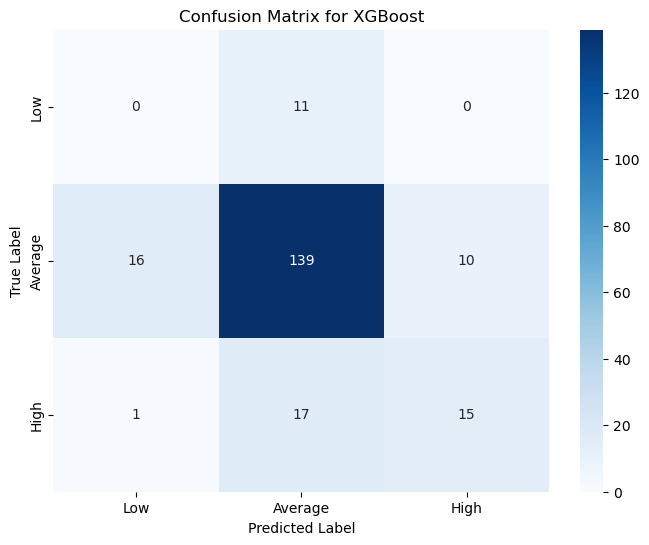

In [84]:
# Define Class labels
class_labels = ['Low', 'Average', 'High']

# Get the numerical encoding of the labels in the desired order
encoded_labels = [encoder.transform([label])[0] for label in class_labels]

# Generate the confusion matrix with labels ordered as 'Low', 'Average', 'High'
cm = confusion_matrix(target_test_encoded, xgb_predictions, labels=encoded_labels)

# Plotting the confusion matrix with labels ordered as specified
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**As expected, the model was able to do well in predicting the 'Average' and 'High' class results, but not so for the 'Low' classes.**

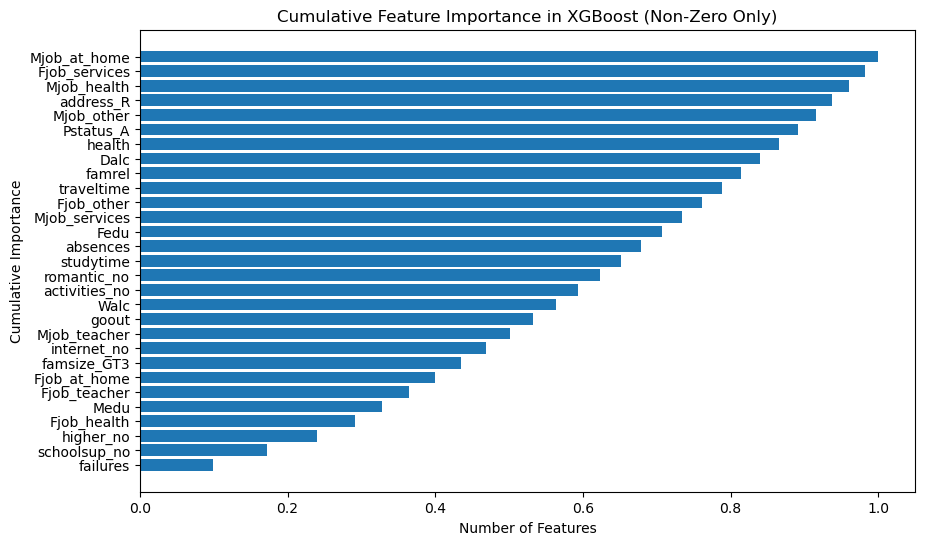

In [35]:
# Get feature importances
importances = xgb_model.feature_importances_

# Filter out features with zero importance
non_zero_indices = np.where(importances != 0)[0]
non_zero_importances = importances[non_zero_indices]
non_zero_features = features_train.columns[non_zero_indices]

# Sort the non-zero features by importance
sorted_idx = np.argsort(non_zero_importances)[::-1]
sorted_importance = np.cumsum(non_zero_importances[sorted_idx])
sorted_features = non_zero_features[sorted_idx]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importance)), sorted_importance, tick_label=sorted_features)
plt.title('Cumulative Feature Importance in XGBoost (Non-Zero Only)')
plt.xlabel('Cumulative Importance')
plt.ylabel('Features')
plt.show()

In [93]:
# Get feature importances
importances = xgb_model.feature_importances_
features = features_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
top_10_features = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Print the top 10 features
print("Top 10 Important Features:")
print(top_10_features)

Top 10 Important Features:
         Feature  Importance
4       failures    0.099251
27  schoolsup_no    0.072536
31     higher_no    0.067638
23   Fjob_health    0.052298
0           Medu    0.036423
26  Fjob_teacher    0.036396
22  Fjob_at_home    0.035468
13   famsize_GT3    0.034629
33   internet_no    0.033529
21  Mjob_teacher    0.033196


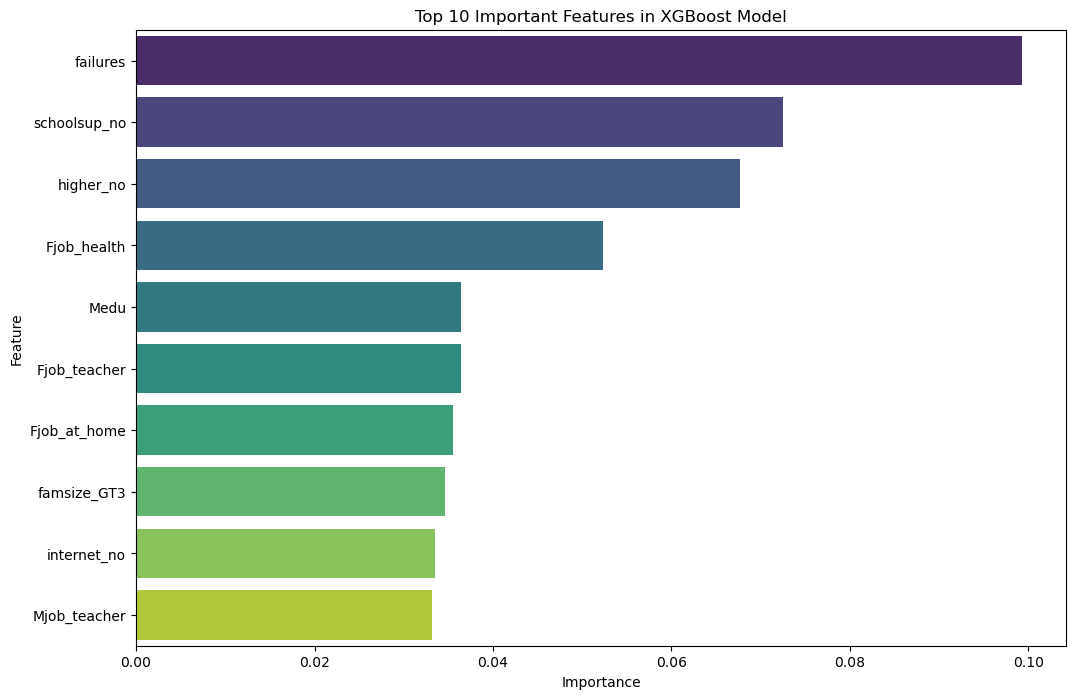

In [94]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_features, x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Important Features in XGBoost Model')
plt.show()

**For the XGB Model, it suggests that failures are the ones impacting student's results the most. And following factors would include not getting school support and not wanting to pursue a higher education, likely impying that these students are going to do badly.**